In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

[-0.13281433 -0.19079727 -0.19583562 ...  0.08588138  0.040711
  0.01581939]
1326600


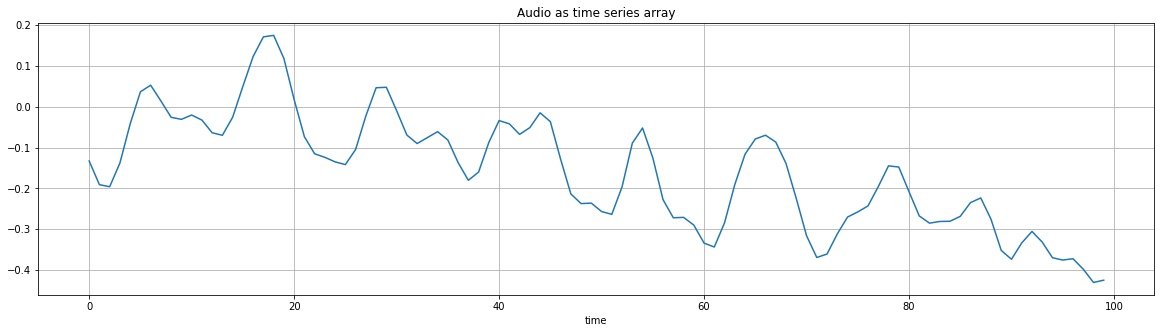

In [2]:
#loading the audio file into timeseriesarray x and samplingrate sr using defalut sr of 22100
audio_data="./data/genres_original/country/country.00000.wav"
x, sr = librosa.load(audio_data, 44100)
print(x)
print(len(x))
plt.figure(figsize=(20, 5))
plt.plot(x[0:100])
plt.title("Audio as time series array")
plt.xlabel("time")
plt.grid()

[[0.02755102 0.02782313 0.02827664 ... 0.03433107 0.03387755 0.03360544]]
Average ZCR: 0.05742311945354274
Standard ZCR: 0.014662946905030876


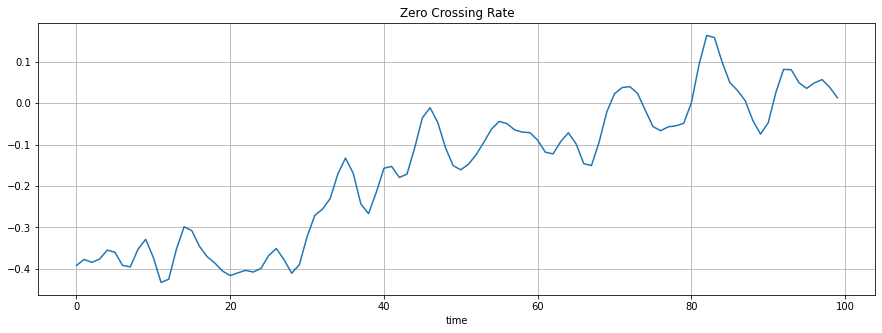

In [3]:
#extracting the zerocrossingrate feature
zcr=librosa.feature.zero_crossing_rate(x,sr)
print(zcr)
avgzcr = np.mean(zcr)
stdzcr = np.std(zcr)
print("Average ZCR:",avgzcr)
print("Standard ZCR:",stdzcr)
plt.figure(figsize=(15, 5))
plt.plot(x[100:200])
plt.title("Zero Crossing Rate")
plt.xlabel("time")
plt.grid()

[2836.11305969 2662.09643491 2299.58625239 ... 2841.83670722 2711.56600753
 2683.29463012]
Spectral Centroid: 2545.641185857306


Text(0.5, 0, 'time')

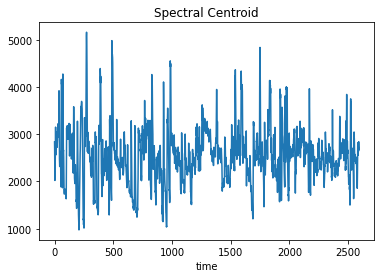

In [4]:
#spectral centroids
spcts = librosa.feature.spectral_centroid(x,sr)[0]
mean_spcts = np.mean(spcts)
print(spcts)
print("Spectral Centroid:",mean_spcts)
plt.plot(spcts)
plt.title("Spectral Centroid")
plt.xlabel("time")

[7149.0234375  6718.359375   5189.50195312 ... 6524.56054688 6416.89453125
 6459.9609375 ]
Mean Spectral Roll off: 5719.732157389323
Standard Spectral Roll off: 1388.2071374355385


Text(0.5, 0, 'time')

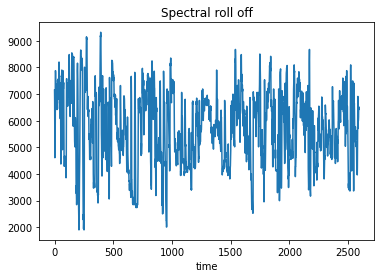

In [5]:
#spectral roll off
sprf = librosa.feature.spectral_rolloff(x,sr)[0]
mean_sprf = np.mean(sprf)
std_sprf = np.std(sprf)
print(sprf)
print("Mean Spectral Roll off:",mean_sprf)
print("Standard Spectral Roll off:",std_sprf)
plt.plot(sprf)
plt.title("Spectral roll off")
plt.xlabel("time")

[[-1.16872406e+02 -1.35673584e+02 -1.57890869e+02 ... -7.59784775e+01
  -7.36527252e+01 -7.43657150e+01]
 [ 1.31746216e+02  1.49677856e+02  1.54517975e+02 ...  1.80475906e+02
   1.85350449e+02  1.87395584e+02]
 [-3.29321632e+01 -4.59342003e+01 -5.46598282e+01 ... -8.28197327e+01
  -7.66640625e+01 -7.12769318e+01]
 ...
 [-8.72740173e+00 -6.16161251e+00 -9.28700328e-01 ... -2.45960236e-01
  -2.83371639e+00 -3.88698268e+00]
 [-5.17384815e+00 -4.54815388e+00 -2.77169418e+00 ...  6.88170958e+00
   3.57780147e+00  7.43312073e+00]
 [-7.92415905e+00 -1.03613796e+01 -1.45004082e+01 ... -4.55510616e-03
  -2.12354589e+00  1.36805081e+00]]


Text(0.5, 0, 'time')

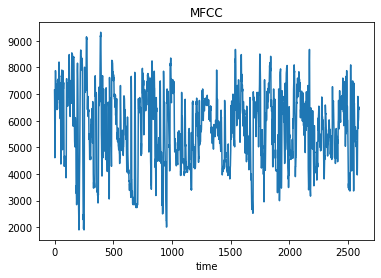

In [6]:
#Mel-Frequency Cepstral Coefficients
mfcc = librosa.feature.mfcc(x,sr)
print(mfcc)
plt.plot(sprf)
plt.title("MFCC")
plt.xlabel("time")

[3535.37617174 3292.69977038 2762.868498   ... 2736.42440619 2778.59239155
 2881.98728163]
(2592,)


Text(0.5, 0, 'time')

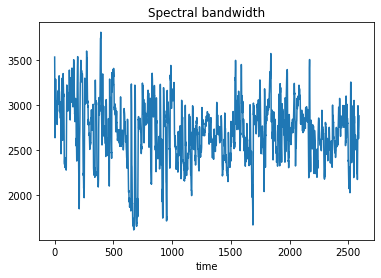

In [7]:
#spectral bandwidth
spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
print(spbw)
print(spbw.shape)
plt.plot(spbw)
plt.title("Spectral bandwidth")
plt.xlabel("time")

(12, 2592)
0.49617803


Text(0.5, 0, 'time')

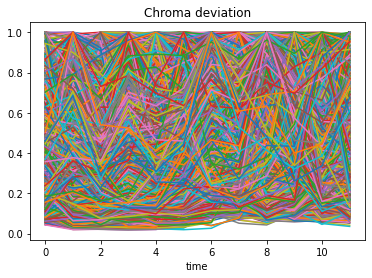

In [8]:
#Chroma deviation
chstft = librosa.feature.chroma_stft(x,sr)
print(chstft.shape)
print(np.mean(chstft))
plt.plot(chstft)
plt.title("Chroma deviation")
plt.xlabel("time")

In [7]:
import os
music_genres = 'country disco hiphop reggae rock'.split()
for genre in music_genres:
    
    for music_file in os.listdir(f'./data/genres_original/{genre}'):
            audio_data = f'./data/genres_original/{genre}/{music_file}'
            x, sr = librosa.load(audio_data, sr=44100, mono=True, offset=5 , duration=35)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(x)
            spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
            spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
            print(f"{genre}  {music_file}  zcr={zero_crossing_rate} spc cen={spectral_centroid} spc ro={spectral_rolloff})")
            
            

country  country.00000.wav  zcr=[[0.03125    0.04589844 0.06494141 ... 0.09228516 0.07470703 0.05322266]] spc cen=[[2574.77056164 2621.25187117 2679.75291122 ... 2751.80898141
  2779.91472141 2679.00649464]] spc ro=[[5017.23632812 5620.16601562 5900.09765625 ... 6373.828125
  6438.42773438 6438.42773438]])
country  country.00001.wav  zcr=[[0.01513672 0.0234375  0.03076172 ... 0.09570312 0.09179688 0.06982422]] spc cen=[[2517.31983464 2334.00705475 2366.13616281 ... 3064.62388279
  3253.34907829 3364.70208528]] spc ro=[[6653.75976562 6223.09570312 6266.16210938 ... 6438.42773438
  6610.69335938 6610.69335938]])
country  country.00002.wav  zcr=[[0.00976562 0.01171875 0.01269531 ... 0.05712891 0.05029297 0.03271484]] spc cen=[[1803.87026755 1556.98667691  981.29949567 ... 2386.59728566
  2398.14472075 2443.54446846]] spc ro=[[4371.24023438 3703.7109375  1787.25585938 ... 5017.23632812
  4866.50390625 4694.23828125]])
country  country.00003.wav  zcr=[[0.01416016 0.02050781 0.02880859 ... 0

country  country.00027.wav  zcr=[[0.02490234 0.03955078 0.06005859 ... 0.02685547 0.02294922 0.015625  ]] spc cen=[[2196.82482267 2071.30996142 2292.54722851 ... 1193.39118196
  1400.92609739 1682.16993622]] spc ro=[[3531.4453125  3983.64257812 5103.36914062 ... 2433.25195312
  2928.515625   3423.77929688]])
country  country.00028.wav  zcr=[[0.01367188 0.02197266 0.03222656 ... 0.03564453 0.03369141 0.02246094]] spc cen=[[1452.45774263 1336.77799796 1216.04563226 ... 1763.82742307
  1686.28463028 1703.1788347 ]] spc ro=[[2433.25195312 2347.11914062 2239.453125   ... 3531.4453125
  3380.71289062 3531.4453125 ]])
country  country.00029.wav  zcr=[[0.0078125  0.01660156 0.02539062 ... 0.03857422 0.03125    0.02099609]] spc cen=[[1064.53823363 1035.17680785 1072.71880757 ... 1247.11544921
  1351.79512453 1860.07123899]] spc ro=[[2239.453125   1765.72265625 1722.65625    ... 2088.72070312
  2304.05273438 2562.45117188]])
country  country.00030.wav  zcr=[[0.01025391 0.01953125 0.02636719 ... 

country  country.00054.wav  zcr=[[0.0078125  0.01025391 0.01464844 ... 0.02539062 0.015625   0.01123047]] spc cen=[[1234.63449254 1220.18731861 1225.61543801 ... 1292.41529327
  1430.69156205 1485.44785824]] spc ro=[[2799.31640625 2906.98242188 3122.31445312 ... 2842.3828125
  3294.58007812 3122.31445312]])
country  country.00055.wav  zcr=[[0.015625   0.02001953 0.02832031 ... 0.06445312 0.05371094 0.03613281]] spc cen=[[1680.16515282 1392.89831365 1124.45683917 ... 1951.5816677
  1960.42421538 2207.72253409]] spc ro=[[2454.78515625 2174.85351562 2067.1875     ... 4112.84179688
  4048.2421875  4177.44140625]])
country  country.00056.wav  zcr=[[0.00976562 0.02539062 0.03515625 ... 0.02148438 0.01611328 0.01220703]] spc cen=[[2279.64136401 2148.63297655 1974.09212628 ... 1157.70008223
  1129.91247345 1281.58732629]] spc ro=[[6416.89453125 6093.89648438 5727.83203125 ... 2605.51757812
  2260.98632812 2627.05078125]])
country  country.00057.wav  zcr=[[0.00732422 0.01171875 0.01757812 ... 0

country  country.00081.wav  zcr=[[0.00830078 0.01074219 0.01611328 ... 0.09619141 0.06738281 0.05029297]] spc cen=[[1355.10941678  939.888939    798.47001543 ... 3101.91890468
  3059.1585411  3171.28095026]] spc ro=[[2304.05273438 1399.65820312 1507.32421875 ... 6976.7578125
  6675.29296875 6782.95898438]])
country  country.00082.wav  zcr=[[0.05566406 0.07080078 0.07714844 ... 0.04052734 0.03710938 0.02587891]] spc cen=[[3611.15787723 3212.87335182 2381.74242652 ... 1474.94464511
  2156.64758897 3077.38391205]] spc ro=[[6696.82617188 6309.22851562 4995.703125   ... 3229.98046875
  4758.83789062 6309.22851562]])
country  country.00083.wav  zcr=[[0.01123047 0.01513672 0.01904297 ... 0.03076172 0.02978516 0.02246094]] spc cen=[[1189.62663037 1234.19912788 1247.24545967 ... 1366.01193411
  1685.22251377 1555.19830567]] spc ro=[[2540.91796875 2648.58398438 2627.05078125 ... 2820.84960938
  3402.24609375 3057.71484375]])
country  country.00084.wav  zcr=[[0.03027344 0.04199219 0.05810547 ... 

disco  disco.00008.wav  zcr=[[0.046875   0.0703125  0.08398438 ... 0.07861328 0.06103516 0.03710938]] spc cen=[[2518.07122833 2602.281885   2634.49394276 ... 2626.63394393
  2578.72606618 2412.46571341]] spc ro=[[4371.24023438 4823.4375     5383.30078125 ... 4521.97265625
  4198.97460938 4026.70898438]])
disco  disco.00009.wav  zcr=[[0.04492188 0.06787109 0.08984375 ... 0.12744141 0.10400391 0.06884766]] spc cen=[[2641.28511842 2426.21501086 2247.8234541  ... 3500.74421581
  3350.94648556 3264.90435764]] spc ro=[[3919.04296875 3854.44335938 3746.77734375 ... 6589.16015625
  6266.16210938 6136.96289062]])
disco  disco.00010.wav  zcr=[[0.03369141 0.06005859 0.08056641 ... 0.09130859 0.05908203 0.03955078]] spc cen=[[2932.08299187 3032.0967493  3242.11216072 ... 2857.43631276
  2454.79111181 2151.66021866]] spc ro=[[6481.49414062 6589.16015625 6998.29101562 ... 5340.234375
  4586.57226562 4048.2421875 ]])
disco  disco.00011.wav  zcr=[[0.05224609 0.07958984 0.10791016 ... 0.09326172 0.0717

disco  disco.00035.wav  zcr=[[0.09375    0.13818359 0.18359375 ... 0.03613281 0.02050781 0.01318359]] spc cen=[[4918.99056314 4556.72173594 4463.1881947  ... 3042.45368395
  3300.06488913 3634.37521797]] spc ro=[[9173.14453125 8807.08007812 8699.4140625  ... 7515.08789062
  7665.8203125  8333.34960938]])
disco  disco.00036.wav  zcr=[[0.05078125 0.06884766 0.08203125 ... 0.078125   0.07128906 0.05517578]] spc cen=[[3586.80101696 3447.08006647 3108.59692794 ... 2794.86296167
  2786.83404797 3139.22078308]] spc ro=[[7665.8203125  7385.88867188 6675.29296875 ... 5835.49804688
  5857.03125    5684.765625  ]])
disco  disco.00037.wav  zcr=[[0.07080078 0.11132812 0.15283203 ... 0.04052734 0.04931641 0.04345703]] spc cen=[[4211.56781696 4240.68910423 4313.51202476 ... 2622.95658652
  2963.42896287 3135.98039996]] spc ro=[[8311.81640625 8397.94921875 8505.61523438 ... 6201.5625
  6804.4921875  6503.02734375]])
disco  disco.00038.wav  zcr=[[0.03320312 0.04931641 0.06152344 ... 0.04150391 0.034667

disco  disco.00062.wav  zcr=[[0.04443359 0.06689453 0.09765625 ... 0.02099609 0.02685547 0.02246094]] spc cen=[[2436.68202574 2285.95930105 2497.19690796 ... 2040.25296343
  2015.19895808 2022.59819633]] spc ro=[[4392.7734375  3940.57617188 4888.03710938 ... 5232.56835938
  5297.16796875 5275.63476562]])
disco  disco.00063.wav  zcr=[[0.00146484 0.00439453 0.00585938 ... 0.03320312 0.02734375 0.02685547]] spc cen=[[1125.17472522  998.94141283  931.84149435 ... 2670.29937274
  3102.76825121 3044.87520748]] spc ro=[[2110.25390625 2131.78710938 2583.984375   ... 6804.4921875
  7084.42382812 7084.42382812]])
disco  disco.00064.wav  zcr=[[0.00195312 0.00976562 0.03076172 ... 0.09277344 0.08398438 0.08251953]] spc cen=[[ 970.32088024 1751.43136612 2306.84498633 ... 4224.82343211
  3294.73214747 2666.51394676]] spc ro=[[1916.45507812 4974.16992188 6223.09570312 ... 6761.42578125
  5577.09960938 4457.37304688]])
disco  disco.00065.wav  zcr=[[0.01464844 0.01904297 0.02099609 ... 0.02587891 0.017

disco  disco.00089.wav  zcr=[[0.01904297 0.02490234 0.03466797 ... 0.05322266 0.04443359 0.02783203]] spc cen=[[1681.34962413 1527.32036041 1379.74352039 ... 1562.63060621
  1568.19265421 1802.1998453 ]] spc ro=[[3466.84570312 3273.046875   3014.6484375  ... 2756.25
  2777.78320312 2993.11523438]])
disco  disco.00090.wav  zcr=[[0.05908203 0.09130859 0.12304688 ... 0.08056641 0.05859375 0.03857422]] spc cen=[[3348.04830071 3293.48735525 3397.40255987 ... 2347.02145777
  2338.6511065  2413.36704614]] spc ro=[[6632.2265625  6696.82617188 6847.55859375 ... 4629.63867188
  4629.63867188 4414.30664062]])
disco  disco.00091.wav  zcr=[[0.04394531 0.06542969 0.09521484 ... 0.10595703 0.10009766 0.07519531]] spc cen=[[2448.23313222 2428.0810594  2416.32362303 ... 3843.24218605
  3900.80224248 3984.7865659 ]] spc ro=[[3962.109375   4134.375      4134.375      ... 7170.55664062
  7256.68945312 7558.15429688]])
disco  disco.00092.wav  zcr=[[0.03222656 0.04248047 0.05322266 ... 0.03515625 0.03173828

hiphop  hiphop.00016.wav  zcr=[[0.00830078 0.00878906 0.01074219 ... 0.00341797 0.00292969 0.00195312]] spc cen=[[1391.09918723 1158.62872391  923.49057871 ... 1094.25794637
  1053.1988931  1103.34563746]] spc ro=[[2260.98632812 1981.0546875  1722.65625    ... 3057.71484375
  2756.25       2325.5859375 ]])
hiphop  hiphop.00017.wav  zcr=[[0.01171875 0.01660156 0.02099609 ... 0.09179688 0.07519531 0.05126953]] spc cen=[[1483.92286201 1569.76917987 1678.3036473  ... 2676.10746579
  2417.62149843 2203.71421923]] spc ro=[[2648.58398438 3531.4453125  4371.24023438 ... 5167.96875
  4823.4375     4737.3046875 ]])
hiphop  hiphop.00018.wav  zcr=[[0.01416016 0.02001953 0.02734375 ... 0.04785156 0.03613281 0.02246094]] spc cen=[[2286.30842078 2038.00882254 1754.56113218 ... 2104.19629287
  2093.32428348 2140.89464105]] spc ro=[[5684.765625   5490.96679688 4392.7734375  ... 5103.36914062
  5060.30273438 5103.36914062]])
hiphop  hiphop.00019.wav  zcr=[[0.13574219 0.21044922 0.26123047 ... 0.04052734

hiphop  hiphop.00043.wav  zcr=[[0.01953125 0.03125    0.04589844 ... 0.03857422 0.02880859 0.01904297]] spc cen=[[2023.45027754 2064.67781498 2207.11515078 ... 1759.29425242
  1760.07382292 1524.28393309]] spc ro=[[3919.04296875 4263.57421875 4931.10351562 ... 3445.3125
  3466.84570312 2799.31640625]])
hiphop  hiphop.00044.wav  zcr=[[0.04931641 0.07617188 0.10546875 ... 0.01611328 0.01220703 0.00683594]] spc cen=[[2829.96944464 2691.5502006  2529.87400027 ...  788.90267762
  1184.40920769 1982.44244242]] spc ro=[[3940.57617188 3897.50976562 3660.64453125 ... 1098.19335938
  1119.7265625  2627.05078125]])
hiphop  hiphop.00045.wav  zcr=[[0.00341797 0.01074219 0.01513672 ... 0.01025391 0.00683594 0.00634766]] spc cen=[[1522.09996742  918.45336557 1409.54917343 ...  569.20074638
   646.44342919  860.97648511]] spc ro=[[1335.05859375  452.19726562 4155.90820312 ...  818.26171875
   796.72851562  861.328125  ]])
hiphop  hiphop.00046.wav  zcr=[[0.00634766 0.00878906 0.01611328 ... 0.04492188 

hiphop  hiphop.00070.wav  zcr=[[0.02246094 0.02832031 0.03027344 ... 0.01269531 0.00830078 0.00439453]] spc cen=[[4038.05340458 3601.5808044  2615.02478628 ... 1171.74250226
  1355.20013967 1558.46308959]] spc ro=[[9043.9453125  8570.21484375 7084.42382812 ... 2605.51757812
  3294.58007812 4435.83984375]])
hiphop  hiphop.00071.wav  zcr=[[0.03076172 0.04003906 0.05419922 ... 0.01611328 0.01269531 0.00830078]] spc cen=[[3163.65531766 3246.90781362 3071.07844259 ...  851.95438756
   874.73442227 1135.61639498]] spc ro=[[8354.8828125  8333.34960938 8139.55078125 ...  624.46289062
   645.99609375  689.0625    ]])
hiphop  hiphop.00072.wav  zcr=[[0.00195312 0.00292969 0.00390625 ... 0.16455078 0.16748047 0.13037109]] spc cen=[[ 766.03205772  921.36673103 1109.83464966 ... 4675.36684181
  5106.40034555 5139.43767487]] spc ro=[[ 775.1953125  1744.18945312 2497.8515625  ... 8139.55078125
  8397.94921875 8397.94921875]])
hiphop  hiphop.00073.wav  zcr=[[0.17626953 0.27099609 0.36279297 ... 0.06054

hiphop  hiphop.00097.wav  zcr=[[0.00683594 0.01953125 0.03027344 ... 0.09179688 0.08349609 0.06005859]] spc cen=[[1393.44444572 1472.73574101 1600.04420674 ... 2897.17673528
  3016.21397541 3415.87188768]] spc ro=[[3552.97851562 3509.91210938 3552.97851562 ... 5813.96484375
  5857.03125    6459.9609375 ]])
hiphop  hiphop.00098.wav  zcr=[[0.01660156 0.02734375 0.03857422 ... 0.09179688 0.09814453 0.07714844]] spc cen=[[2722.116507   2567.50615154 2422.83771261 ... 2818.4293931
  3041.76124668 3341.39057231]] spc ro=[[5663.23242188 5598.6328125  5620.16601562 ... 5318.70117188
  5641.69921875 5964.69726562]])
hiphop  hiphop.00099.wav  zcr=[[0.02636719 0.04248047 0.07128906 ... 0.02734375 0.0234375  0.01806641]] spc cen=[[1582.47648594 1571.98772211 1953.35106061 ... 1620.29591036
  1815.5792137  2253.12880653]] spc ro=[[3036.18164062 3036.18164062 3617.578125   ... 3143.84765625
  3186.9140625  3875.9765625 ]])
reggae  reggae.00000.wav  zcr=[[0.03662109 0.06298828 0.09179688 ... 0.052246

reggae  reggae.00024.wav  zcr=[[0.04492188 0.05859375 0.07470703 ... 0.01318359 0.02001953 0.01757812]] spc cen=[[3142.13062566 2838.45492876 2790.50035506 ...  963.43260836
  1455.58588704 2161.29707579]] spc ro=[[7299.75585938 7041.35742188 7019.82421875 ... 2174.85351562
  2670.1171875  4414.30664062]])
reggae  reggae.00025.wav  zcr=[[0.00390625 0.00585938 0.01220703 ... 0.05126953 0.03955078 0.02783203]] spc cen=[[ 914.39661751  831.24280934  777.42047757 ... 1693.56120582
  1593.62750524 1776.88090957]] spc ro=[[1873.38867188 1744.18945312 1701.12304688 ... 3488.37890625
  3165.38085938 2928.515625  ]])
reggae  reggae.00026.wav  zcr=[[0.01318359 0.01416016 0.02197266 ... 0.04296875 0.02441406 0.01806641]] spc cen=[[1710.23457973 1560.73385221 1565.47113523 ... 1881.53063914
  1953.27870675 2217.47142996]] spc ro=[[3983.64257812 3962.109375   4414.30664062 ... 3983.64257812
  4285.10742188 4672.70507812]])
reggae  reggae.00027.wav  zcr=[[0.01855469 0.02392578 0.03125    ... 0.04394

KeyboardInterrupt: 

In [9]:
#populating headers
headers = 'filename zcr_mean zcr_std spectral_centroid mean_spectral_rolloff std_spectral_rolloff spectral_bandwidth chroma_deviation_mean '
for index in range(1, 21):
    headers += f' mfcc{index}'
headers += ' genre'
headers = headers.split()
print(headers)

['filename', 'zcr_mean', 'zcr_std', 'spectral_centroid', 'mean_spectral_rolloff', 'std_spectral_rolloff', 'spectral_bandwidth', 'chroma_deviation_mean', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'genre']


In [10]:
#storing headers into csv
import csv
file = open('mycsv.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(headers)

In [11]:
#storing values into csv
import os
music_genres = 'country disco hiphop reggae rock'.split()
for genre in music_genres:
    for music_file in os.listdir(f'./data/genres_original/{genre}'):
        audio_data = f'./data/genres_original/{genre}/{music_file}'
        x, sr = librosa.load(audio_data, mono=True)
        zcr=librosa.feature.zero_crossing_rate(x,sr)
        spcts = librosa.feature.spectral_centroid(x,sr)[0]
        sprf = librosa.feature.spectral_rolloff(x,sr)[0]
        mfcc = librosa.feature.mfcc(y=x, sr=sr)  
        spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
        chstft = librosa.feature.chroma_stft(x,sr)
        feature_data = f'{music_file} {np.mean(zcr)} {np.std(zcr)} {np.mean(spcts)} {np.mean(sprf)} {np.std(sprf)} {np.mean(spbw)} {np.mean(chstft)}'
        for m in mfcc:
            feature_data += f' {np.mean(m)}'
        feature_data += f' {genre}'
        file = open('mycsv.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(feature_data.split())